# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings 

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet(r"D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-1.parquet")
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
sampled_data = df.sample(frac = 0.07, random_state = 42)
#sampled_data.info()
print(df.VendorID.count())
print(sampled_data.VendorID.count())
# It is recommmended to not load all the files at once to avoid memory overload

3041714
212920


In [6]:
# from google.colab 
#import drive
#drive.mount(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        print(file_path)
        data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = data.sample(frac = 0.008, random_state = 42)

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([sampled_data, df]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-1.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-10.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-11.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-12.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-2.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-3.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-4.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-5.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-6.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-7.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-8.parquet
D:\Savitri\EDA\Assignment\Datasets and Dictionary\trip_records\2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\Final\final.csv')
print(df.count())

VendorID                 303427
tpep_pickup_datetime     303427
tpep_dropoff_datetime    303427
passenger_count          293109
trip_distance            303427
RatecodeID               293109
store_and_fwd_flag       293109
PULocationID             303427
DOLocationID             303427
payment_type             303427
fare_amount              303427
extra                    303427
mta_tax                  303427
tip_amount               303427
tolls_amount             303427
improvement_surcharge    303427
total_amount             303427
congestion_surcharge     293109
Airport_fee              269346
airport_fee               23763
dtype: int64


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [266]:
# Load the new data file
dataframe = pd.read_csv(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\Final\final.csv')
dataframe.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
count,3.034270e+05,303427.000000,293109.000000,303427.000000,293109.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,303427.000000,293109.000000,269346.000000,23763.000000
mean,1.606993e+06,1.737769,1.372350,3.642273,1.634699,165.142940,163.970771,1.163908,19.859440,1.576806,0.495321,3.559505,0.596158,0.999099,28.938576,2.309951,0.147673,0.108888
std,9.377142e+05,0.445062,0.897175,75.048993,7.387687,64.007136,69.781998,0.508379,18.300885,1.827202,0.048408,4.109602,2.176319,0.029631,22.885214,0.662928,0.476177,0.352690
min,2.700000e+01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-5.000000,-2.500000,-1.250000,-1.250000
25%,8.003765e+05,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,0.000000
50%,1.596561e+06,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,0.000000
75%,2.394059e+06,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.420000,0.000000,1.000000,30.900000,2.500000,0.000000,0.000000
max,3.522262e+06,6.000000,8.000000,37523.740000,99.000000,265.000000,265.000000,4.000000,750.000000,13.000000,0.800000,300.000000,132.040000,1.000000,757.940000,2.500000,1.750000,1.250000


In [267]:
dataframe.isnull().sum() * 100 / len(dataframe)

Unnamed: 0                0.000000
VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.400488
trip_distance             0.000000
RatecodeID                3.400488
store_and_fwd_flag        3.400488
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.400488
Airport_fee              11.232026
airport_fee              92.168462
dtype: float64

In [268]:
# df.info()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303427 entries, 0 to 303426
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303427 non-null  int64  
 1   VendorID               303427 non-null  int64  
 2   tpep_pickup_datetime   303427 non-null  object 
 3   tpep_dropoff_datetime  303427 non-null  object 
 4   passenger_count        293109 non-null  float64
 5   trip_distance          303427 non-null  float64
 6   RatecodeID             293109 non-null  float64
 7   store_and_fwd_flag     293109 non-null  object 
 8   PULocationID           303427 non-null  int64  
 9   DOLocationID           303427 non-null  int64  
 10  payment_type           303427 non-null  int64  
 11  fare_amount            303427 non-null  float64
 12  extra                  303427 non-null  float64
 13  mta_tax                303427 non-null  float64
 14  tip_amount             303427 non-nu

In [269]:
print('improvement_surcharge: ' , ((dataframe['improvement_surcharge'] == 1).sum() / 303427) * 100) #100 (99.89%)
print('tolls_amount:', ((dataframe['tolls_amount'] == 0).sum() / 303427) * 100)# 92%
print('extra:', ((dataframe['extra'] == 0).sum() / 303427) * 100) #40%
print('mta_extra:', ((dataframe['mta_tax'] == 0.5).sum() / 303427) * 100) #99%
print('congestion_surcharge(0):', ((dataframe['congestion_surcharge'] == 0).sum() / 293109) * 100) # 7%
print('congestion_surcharge(2.5):', ((dataframe['congestion_surcharge'] == 2.5).sum() / 293109) * 100) #92%
print('store_and_fwd_flag:', ((dataframe['store_and_fwd_flag'] == 'N').sum() / 293109) * 100) #99.4%
#print(((dataframe['payment_type'] == 1).sum() / 303427) * 100) #78.74%
#print(((dataframe['payment_type'] == 2).sum() / 303427) * 100) #17.4%

#print(((dataframe['airport_fee'] == 0).sum() / 23763) * 100) #99.4%
print(dataframe['Unnamed: 0'].count()) #99.4%

improvement_surcharge:  99.89684504015793
tolls_amount: 91.85108774103821
extra: 40.308542087553185
mta_extra: 99.06633226443263
congestion_surcharge(0): 7.594444387582776
congestion_surcharge(2.5): 92.40180274232452
store_and_fwd_flag: 99.4114817354636
303427


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [270]:
# Fix the index and drop any columns that are not needed
# Drop below colums as their values are constant, giving very less to no room for meaningfull analysis
dataframe = dataframe.drop('improvement_surcharge', axis = 1) # improvement_surcharge has 1 for:  100% 
dataframe = dataframe.drop('tolls_amount', axis = 1) #tolls_amount is 0 for: 92% of total data.
dataframe = dataframe.drop('extra', axis = 1) # extra is 0 for: 40% of total data
dataframe = dataframe.drop('mta_tax', axis = 1) # mta_extra is 0.5 for: 99% of total data
dataframe = dataframe.drop('Unnamed: 0', axis = 1) # after concat of parquet files this columns was added, which doen not have any title.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303427 entries, 0 to 303426
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               303427 non-null  int64  
 1   tpep_pickup_datetime   303427 non-null  object 
 2   tpep_dropoff_datetime  303427 non-null  object 
 3   passenger_count        293109 non-null  float64
 4   trip_distance          303427 non-null  float64
 5   RatecodeID             293109 non-null  float64
 6   store_and_fwd_flag     293109 non-null  object 
 7   PULocationID           303427 non-null  int64  
 8   DOLocationID           303427 non-null  int64  
 9   payment_type           303427 non-null  int64  
 10  fare_amount            303427 non-null  float64
 11  tip_amount             303427 non-null  float64
 12  total_amount           303427 non-null  float64
 13  congestion_surcharge   293109 non-null  float64
 14  Airport_fee            269346 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [271]:
# Combine the two airport fee columns
#print(((dataframe['Airport_fee'] == 0).sum() / 269346) * 100) #99.4%
#print(((dataframe['airport_fee'] == 0).sum() / 23763) * 100) #99.4%
#left = dataframe['Airport_fee']
#right = dataframe['airport_fee']
#dataframe['result'] = dataframe['Airport_fee'] + dataframe['airport_fee']
#dataframe['result'].isnull().sum()       
import math
#nonenull = lambda x, y : y if(math.isnan(x)) else x
#print( nonenull(10, 20))


#dataframe['Combined'] = dataframe['Airport_fee'].apply(lambda x: '0' if(math.isnan(x)) else x)
#dataframe['Combined'].count()
#dataframe.drop('Combined', axis = 1)
#dataframe.info()
#dataframe['union'] = dataframe['Airport_fee'].apply(lambda x: x.union(dataframe['airport_fee']))
#dataframe.to_csv(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\Final\final_combo12.csv')

dataframe['Airport_fee'] = dataframe[['Airport_fee', 'airport_fee']].max(axis = 1)
#dataframe.info()
#dataframe.to_csv(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\Final\final_combo12.csv')

dataframe = dataframe.drop('airport_fee', axis = 1)
#dataframe = dataframe.drop('Combined', axis = 1)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303427 entries, 0 to 303426
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               303427 non-null  int64  
 1   tpep_pickup_datetime   303427 non-null  object 
 2   tpep_dropoff_datetime  303427 non-null  object 
 3   passenger_count        293109 non-null  float64
 4   trip_distance          303427 non-null  float64
 5   RatecodeID             293109 non-null  float64
 6   store_and_fwd_flag     293109 non-null  object 
 7   PULocationID           303427 non-null  int64  
 8   DOLocationID           303427 non-null  int64  
 9   payment_type           303427 non-null  int64  
 10  fare_amount            303427 non-null  float64
 11  tip_amount             303427 non-null  float64
 12  total_amount           303427 non-null  float64
 13  congestion_surcharge   293109 non-null  float64
 14  Airport_fee            293109 non-nu

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [272]:
# check where values of fare amount are negative
dataframe[dataframe['fare_amount'] < 0] #None

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [273]:
# Analyse RatecodeID for the negative fare amounts



In [274]:
# Find which columns have negative values



In [275]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [276]:
# Find the proportion of missing values in each column
# total records considered for analysis : 303427 , 10318
dataframe.isnull().sum()
print('passenger_count: ', ((dataframe.passenger_count.isnull().sum() / 303427) * 100)) # 3% 293109
print('RatecodeID: ', (dataframe.RatecodeID.isnull().sum() / 303427) * 100) # 3% 293109 
print('store_and_fwd_flag: ',(dataframe.store_and_fwd_flag.isnull().sum() / 303427) * 100) # 3% store_and_fwd_flag     293109
print('Airport_fee: ', (dataframe.Airport_fee.isnull().sum() / 303427) * 100) # 3%  Airport_fee            293109


passenger_count:  3.4004884206085815
RatecodeID:  3.4004884206085815
store_and_fwd_flag:  3.4004884206085815
Airport_fee:  3.4004884206085815


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [277]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
dataframe[dataframe.passenger_count.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,NaN,0.00,NaN,NaN,106,140,0,35.72,0.00,39.72,NaN,NaN
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,NaN,4.51,NaN,NaN,186,239,0,22.04,5.21,31.25,NaN,NaN
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,NaN,2.41,NaN,NaN,262,161,0,18.13,2.00,24.13,NaN,NaN
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,NaN,2.00,NaN,NaN,151,142,0,15.60,4.42,26.52,NaN,NaN
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,NaN,1.90,NaN,NaN,230,239,0,16.30,4.06,24.36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,NaN,1.64,NaN,NaN,234,230,0,17.55,4.31,25.86,NaN,NaN
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,NaN,5.03,NaN,NaN,79,163,0,24.18,5.64,33.82,NaN,NaN
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,NaN,0.00,NaN,NaN,230,239,0,13.50,4.00,26.00,NaN,NaN
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,NaN,18.18,NaN,NaN,166,132,0,77.00,17.01,102.06,NaN,NaN


In [278]:
dataframe['passenger_count'].mode()[0]
dataframe['passenger_count'] = dataframe['passenger_count'].fillna(dataframe['passenger_count'].mode()[0])

Did you find zeroes in passenger_count? Handle these.

In [279]:
dataframe[dataframe['passenger_count'] == 0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
8,1,2023-09-26 21:32:42,2023-09-26 21:51:16,0.0,4.4,1.0,N,68,151,1,20.5,5.10,30.60,2.5,0.0
40,1,2023-09-05 13:40:27,2023-09-05 14:08:20,0.0,3.4,1.0,N,236,234,1,26.1,6.00,36.10,2.5,0.0
53,1,2023-09-02 14:20:59,2023-09-02 14:38:55,0.0,3.0,1.0,N,246,43,1,18.4,1.00,23.40,2.5,0.0
271,1,2023-09-08 23:58:57,2023-09-09 00:16:38,0.0,10.0,1.0,N,93,233,1,39.4,10.25,61.59,2.5,0.0
314,1,2023-09-13 21:16:06,2023-09-13 21:26:09,0.0,2.0,1.0,N,170,144,1,12.1,1.00,18.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302822,1,2023-01-05 10:50:10,2023-01-05 10:53:09,0.0,0.5,1.0,N,233,233,1,5.1,1.80,10.90,2.5,0.0
302861,1,2023-01-04 08:22:58,2023-01-04 08:49:57,0.0,5.0,1.0,N,230,261,1,28.9,6.55,39.45,2.5,0.0
302918,1,2023-01-06 11:57:50,2023-01-06 12:09:53,0.0,1.9,1.0,N,236,238,1,13.5,3.50,21.00,2.5,0.0
303025,1,2023-01-07 21:38:46,2023-01-07 22:02:30,0.0,3.5,1.0,N,249,229,2,22.6,0.00,27.60,2.5,0.0


In [280]:
# 1.0 is mode if passenger_count, computing mode inside labda was slowing down the process hence hard coded.
dataframe['passenger_count'].apply(lambda x: 1.0 if x == 0.0 else x)

0         1.0
1         4.0
2         2.0
3         1.0
4         1.0
         ... 
303422    2.0
303423    1.0
303424    1.0
303425    2.0
303426    2.0
Name: passenger_count, Length: 303427, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [281]:
# Fix missing values in 'RatecodeID'
dataframe[dataframe.RatecodeID.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,1.0,0.00,NaN,NaN,106,140,0,35.72,0.00,39.72,NaN,NaN
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,1.0,4.51,NaN,NaN,186,239,0,22.04,5.21,31.25,NaN,NaN
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,1.0,2.41,NaN,NaN,262,161,0,18.13,2.00,24.13,NaN,NaN
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,1.0,2.00,NaN,NaN,151,142,0,15.60,4.42,26.52,NaN,NaN
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,1.0,1.90,NaN,NaN,230,239,0,16.30,4.06,24.36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,1.0,1.64,NaN,NaN,234,230,0,17.55,4.31,25.86,NaN,NaN
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,1.0,5.03,NaN,NaN,79,163,0,24.18,5.64,33.82,NaN,NaN
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,1.0,0.00,NaN,NaN,230,239,0,13.50,4.00,26.00,NaN,NaN
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,1.0,18.18,NaN,NaN,166,132,0,77.00,17.01,102.06,NaN,NaN


In [282]:
dataframe['RatecodeID'].mode()[0]
dataframe['RatecodeID'] = dataframe['RatecodeID'].fillna(dataframe['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [283]:
# handle null values in congestion_surcharge
dataframe[dataframe.congestion_surcharge.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,1.0,0.00,1.0,NaN,106,140,0,35.72,0.00,39.72,NaN,NaN
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,1.0,4.51,1.0,NaN,186,239,0,22.04,5.21,31.25,NaN,NaN
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,1.0,2.41,1.0,NaN,262,161,0,18.13,2.00,24.13,NaN,NaN
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,1.0,2.00,1.0,NaN,151,142,0,15.60,4.42,26.52,NaN,NaN
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,1.0,1.90,1.0,NaN,230,239,0,16.30,4.06,24.36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,1.0,1.64,1.0,NaN,234,230,0,17.55,4.31,25.86,NaN,NaN
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,1.0,5.03,1.0,NaN,79,163,0,24.18,5.64,33.82,NaN,NaN
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,1.0,0.00,1.0,NaN,230,239,0,13.50,4.00,26.00,NaN,NaN
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,1.0,18.18,1.0,NaN,166,132,0,77.00,17.01,102.06,NaN,NaN


In [284]:
dataframe['congestion_surcharge'].mode()[0] # it is 2.5
dataframe['congestion_surcharge'] = dataframe['congestion_surcharge'].fillna(dataframe['congestion_surcharge'].mode()[0])

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [285]:
# Handle any remaining missing values
dataframe.isnull().sum() * 100 / len(dataframe)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.400488
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
tip_amount               0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              3.400488
dtype: float64

In [286]:
# Handle store_and_fwd_flag and Airport_fee
dataframe[dataframe.store_and_fwd_flag.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,1.0,0.00,1.0,NaN,106,140,0,35.72,0.00,39.72,2.5,NaN
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,1.0,4.51,1.0,NaN,186,239,0,22.04,5.21,31.25,2.5,NaN
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,1.0,2.41,1.0,NaN,262,161,0,18.13,2.00,24.13,2.5,NaN
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,1.0,2.00,1.0,NaN,151,142,0,15.60,4.42,26.52,2.5,NaN
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,1.0,1.90,1.0,NaN,230,239,0,16.30,4.06,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,1.0,1.64,1.0,NaN,234,230,0,17.55,4.31,25.86,2.5,NaN
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,1.0,5.03,1.0,NaN,79,163,0,24.18,5.64,33.82,2.5,NaN
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,1.0,0.00,1.0,NaN,230,239,0,13.50,4.00,26.00,2.5,NaN
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,1.0,18.18,1.0,NaN,166,132,0,77.00,17.01,102.06,2.5,NaN


In [287]:
# impute store_and_fwd_flag
dataframe['store_and_fwd_flag'].mode()[0] # it is N
dataframe['store_and_fwd_flag'] = dataframe['store_and_fwd_flag'].fillna(dataframe['store_and_fwd_flag'].mode()[0])

In [288]:
dataframe[dataframe.Airport_fee.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,1.0,0.00,1.0,N,106,140,0,35.72,0.00,39.72,2.5,NaN
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,1.0,4.51,1.0,N,186,239,0,22.04,5.21,31.25,2.5,NaN
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,1.0,2.41,1.0,N,262,161,0,18.13,2.00,24.13,2.5,NaN
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,1.0,2.00,1.0,N,151,142,0,15.60,4.42,26.52,2.5,NaN
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,1.0,1.90,1.0,N,230,239,0,16.30,4.06,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,1.0,1.64,1.0,N,234,230,0,17.55,4.31,25.86,2.5,NaN
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,1.0,5.03,1.0,N,79,163,0,24.18,5.64,33.82,2.5,NaN
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,1.0,0.00,1.0,N,230,239,0,13.50,4.00,26.00,2.5,NaN
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,1.0,18.18,1.0,N,166,132,0,77.00,17.01,102.06,2.5,NaN


In [289]:
# impute store_and_fwd_flag
dataframe['Airport_fee'].mode()[0] # it is 0.0
dataframe['Airport_fee'] = dataframe['Airport_fee'].fillna(dataframe['Airport_fee'].mode()[0])

In [290]:
# final null check
dataframe.isnull().sum() * 100 / len(dataframe)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
tip_amount               0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
dtype: float64

**2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [291]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

#First, let us remove 7+ passenger counts as there are very less instances.

In [292]:
# remove passenger_count > 6
dataframe[dataframe.passenger_count > 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
234241,2,2023-11-29 17:46:17,2023-11-29 17:46:21,8.0,0.00,5.0,N,264,264,1,86.0,2.00,89.50,0.0,0.0
273284,2,2023-10-15 19:22:25,2023-10-15 19:22:30,8.0,0.08,5.0,N,238,264,1,83.0,20.88,104.38,0.0,0.0


In [293]:
dataframe = dataframe.drop(234241)
dataframe = dataframe.drop(273284)
dataframe[dataframe.passenger_count > 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee


In [294]:
# Continue with outlier handling
# Drop Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
dataframe[(dataframe.trip_distance == 0) & (dataframe.fare_amount > 300)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
4789,1,2023-09-30 08:19:28,2023-09-30 08:19:28,0.0,0.0,99.0,N,264,264,3,400.00,0.00,400.00,0.0,0.0
22935,2,2023-07-24 21:43:56,2023-07-24 21:57:57,1.0,0.0,5.0,N,265,265,2,500.00,0.00,501.00,0.0,0.0
32165,1,2023-07-20 16:17:03,2023-07-20 16:17:23,1.0,0.0,5.0,N,193,193,2,555.54,0.00,556.54,0.0,0.0
55134,2,2023-05-16 19:12:48,2023-05-16 19:12:51,1.0,0.0,5.0,N,265,265,1,396.00,0.80,398.30,0.0,0.0
188664,2,2023-03-19 23:12:29,2023-03-19 23:12:35,1.0,0.0,5.0,N,265,265,2,533.00,0.00,534.00,0.0,0.0
226859,2,2023-11-26 16:04:06,2023-11-26 16:04:12,1.0,0.0,5.0,N,265,265,1,305.14,61.23,367.37,0.0,0.0


In [295]:
dataframe = dataframe.drop([4789, 22935, 32165, 55134, 188664, 226859])
dataframe[(dataframe.trip_distance == 0) & (dataframe.fare_amount > 300)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee


In [296]:
# Drop Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
dataframe[(dataframe.trip_distance == 0) & (dataframe.fare_amount == 0) & (dataframe.PULocationID != dataframe.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
68337,1,2023-05-29 06:59:22,2023-05-29 06:59:22,1.0,0.0,2.0,Y,132,264,3,0.0,0.0,0.0,0.0,0.0
84273,1,2023-04-14 00:36:54,2023-04-14 00:36:54,2.0,0.0,5.0,Y,90,264,2,0.0,0.0,0.0,0.0,0.0
98342,1,2023-04-12 15:25:42,2023-04-12 15:25:42,1.0,0.0,1.0,N,186,264,3,0.0,0.0,0.0,0.0,0.0
124873,1,2023-08-21 05:47:49,2023-08-21 05:47:49,2.0,0.0,3.0,Y,162,264,3,0.0,0.0,0.0,0.0,0.0
213444,1,2023-12-16 16:35:24,2023-12-16 16:35:24,1.0,0.0,5.0,Y,163,264,2,0.0,0.0,0.0,0.0,0.0
248652,1,2023-11-14 13:15:43,2023-11-14 13:25:53,1.0,0.0,1.0,N,74,41,1,0.0,0.0,4.0,2.5,0.0


In [297]:
dataframe = dataframe.drop([68337, 84273, 98342, 124873, 213444, 248652])
dataframe[(dataframe.trip_distance == 0) & (dataframe.fare_amount == 0) & (dataframe.PULocationID != dataframe.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee


In [298]:
# Drop Entries where `trip_distance` is more than 250  miles.
dataframe[(dataframe.trip_distance > 250)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
92761,2,2023-04-04 01:10:00,2023-04-04 01:36:00,1.0,16655.41,1.0,N,137,42,0,24.27,0.00,28.27,2.5,0.0
131857,2,2023-08-26 10:13:00,2023-08-26 10:33:00,1.0,37523.74,1.0,N,257,114,0,26.29,7.45,44.68,2.5,0.0
302707,2,2023-01-14 19:37:00,2023-01-14 19:56:00,1.0,4202.47,1.0,N,262,148,0,27.44,4.72,36.16,2.5,0.0


In [299]:
dataframe = dataframe.drop([92761, 131857, 302707])
dataframe[(dataframe.trip_distance > 250)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee


In [300]:
dataframe[dataframe.payment_type == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
17,1,2023-09-30 21:14:30,2023-09-30 21:44:51,1.0,0.00,1.0,N,106,140,0,35.72,0.00,39.72,2.5,0.0
18,2,2023-09-03 13:58:00,2023-09-03 14:22:10,1.0,4.51,1.0,N,186,239,0,22.04,5.21,31.25,2.5,0.0
41,2,2023-09-15 17:48:37,2023-09-15 18:03:01,1.0,2.41,1.0,N,262,161,0,18.13,2.00,24.13,2.5,0.0
50,1,2023-09-29 19:14:13,2023-09-29 19:29:25,1.0,2.00,1.0,N,151,142,0,15.60,4.42,26.52,2.5,0.0
54,1,2023-09-02 16:58:55,2023-09-02 17:15:06,1.0,1.90,1.0,N,230,239,0,16.30,4.06,24.36,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303236,2,2023-01-07 16:07:00,2023-01-07 16:29:00,1.0,1.64,1.0,N,234,230,0,17.55,4.31,25.86,2.5,0.0
303327,2,2023-01-02 20:20:35,2023-01-02 20:39:02,1.0,5.03,1.0,N,79,163,0,24.18,5.64,33.82,2.5,0.0
303348,1,2023-01-11 17:18:50,2023-01-11 17:33:11,1.0,0.00,1.0,N,230,239,0,13.50,4.00,26.00,2.5,0.0
303386,2,2023-01-25 13:18:49,2023-01-25 14:13:05,1.0,18.18,1.0,N,166,132,0,77.00,17.01,102.06,2.5,0.0


In [301]:
# drop all Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
indexPayment = dataframe[(dataframe['payment_type'] == 0)].index
dataframe.drop(indexPayment, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293095 entries, 0 to 303426
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               293095 non-null  int64  
 1   tpep_pickup_datetime   293095 non-null  object 
 2   tpep_dropoff_datetime  293095 non-null  object 
 3   passenger_count        293095 non-null  float64
 4   trip_distance          293095 non-null  float64
 5   RatecodeID             293095 non-null  float64
 6   store_and_fwd_flag     293095 non-null  object 
 7   PULocationID           293095 non-null  int64  
 8   DOLocationID           293095 non-null  int64  
 9   payment_type           293095 non-null  int64  
 10  fare_amount            293095 non-null  float64
 11  tip_amount             293095 non-null  float64
 12  total_amount           293095 non-null  float64
 13  congestion_surcharge   293095 non-null  float64
 14  Airport_fee            293095 non-null  f

In [302]:
# Do any columns need standardising?
dataframe.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,congestion_surcharge,Airport_fee
0,2,2023-09-30 01:39:21,2023-09-30 01:53:09,1.0,2.38,1.0,N,246,162,1,14.9,3.98,23.88,2.5,0.0
1,2,2023-09-02 04:10:38,2023-09-02 04:24:29,4.0,4.37,1.0,N,246,151,1,19.8,4.96,29.76,2.5,0.0
2,2,2023-09-11 07:21:33,2023-09-11 07:51:17,2.0,15.58,3.0,N,161,1,1,79.7,23.86,119.31,0.0,0.0
3,2,2023-09-28 18:24:58,2023-09-28 18:32:11,1.0,1.24,1.0,N,231,249,1,9.3,2.00,17.80,2.5,0.0
4,2,2023-09-30 23:48:50,2023-10-01 00:07:41,1.0,4.08,1.0,N,113,263,1,21.2,2.00,28.20,2.5,0.0


In [303]:
# check RateCode_id
#dataframe.RatecodeID.describe()
print(dataframe.RatecodeID.value_counts()) # 99 is not listed in data dictionry so drop all rows with RateCodeId = 99
indexRatecode = dataframe[(dataframe['RatecodeID'] == 99)].index
print(indexRatecode)
dataframe.drop(indexRatecode, inplace=True) # 0.5% data is dropped

RatecodeID
1.0     276543
2.0      11674
5.0       1688
99.0      1672
3.0        937
4.0        581
Name: count, dtype: int64
Index([   234,    337,    530,    535,    640,    722,   1574,   1736,   1762,
         1995,
       ...
       300499, 300508, 300626, 300925, 301019, 301088, 302087, 302612, 303012,
       303301],
      dtype='int64', length=1672)


291423


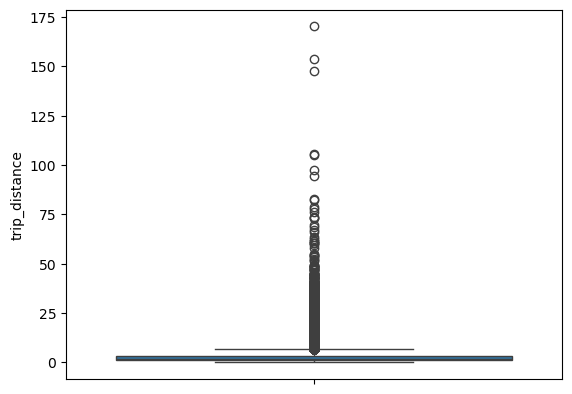

291411

In [304]:
# clean trip_distance
print(dataframe.VendorID.count())               
dataframe.trip_distance.count() # before drop 293095
sns.boxplot(dataframe['trip_distance'])
plt.show()
# From plot outliers after 75 are very sparse
indexPayment = dataframe[dataframe.trip_distance > 75].index
dataframe.drop(indexPayment, inplace=True) #
dataframe.trip_distance.count() #after drop 291411

In [305]:
print(dataframe[(dataframe.trip_distance < 1.05) & (dataframe.trip_distance < 15.51)].count())
dataframe.trip_distance.describe()
iqr = 3.37 - 1.05
upper_outliers = 3.37 + (1.5 * iqr)
print(upper_outliers)
print(np.percentile(dataframe.trip_distance, 95))
print(np.percentile(dataframe.trip_distance, 25))

VendorID                 72368
tpep_pickup_datetime     72368
tpep_dropoff_datetime    72368
passenger_count          72368
trip_distance            72368
RatecodeID               72368
store_and_fwd_flag       72368
PULocationID             72368
DOLocationID             72368
payment_type             72368
fare_amount              72368
tip_amount               72368
total_amount             72368
congestion_surcharge     72368
Airport_fee              72368
dtype: int64
6.8500000000000005
15.48
1.05


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [306]:
dataframe.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Numerical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge`: Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

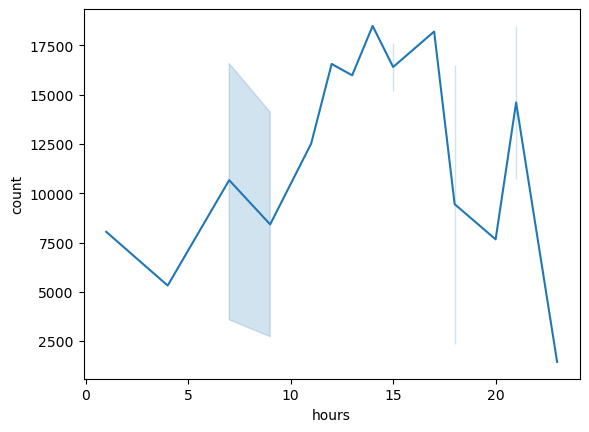

In [307]:
# Find and show the hourly trends in taxi pickups
import datetime 
from datetime import datetime
import plotly.express as px
#str_date = '2023-09-30 01:39:21'
str_format = '%Y-%m-%d %H:%M:%S'
#date_obj = datetime.strptime(str_date, str_format)
#print(date_obj.time().hour)
dataframe['hours'] = dataframe['tpep_pickup_datetime'].apply(lambda x: (datetime.strptime(x, str_format)).time().hour) #2023-09-30 01:39:21
#dataframe['hours'].to_csv(r"D:\Savitri\EDA\Assignment\hours.csv")
#line_plt = dataframe['hours'].value_counts().plot() #.line()
#val_counts = dataframe['hours'].value_counts()
#fig = px.line(dataframe, x=dataframe['hours'], y=val_counts)
#dataframe['numday'] = dataframe['tpep_pickup_datetime'].apply(lambda x: (datetime.strptime(x, str_format)).weekday() + 1) #2023-09-30 01:39:21
#days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
val_counts = dataframe.groupby('hours')['hours'].value_counts()
sns.lineplot(x=dataframe['hours'], y=val_counts)
plt.show()

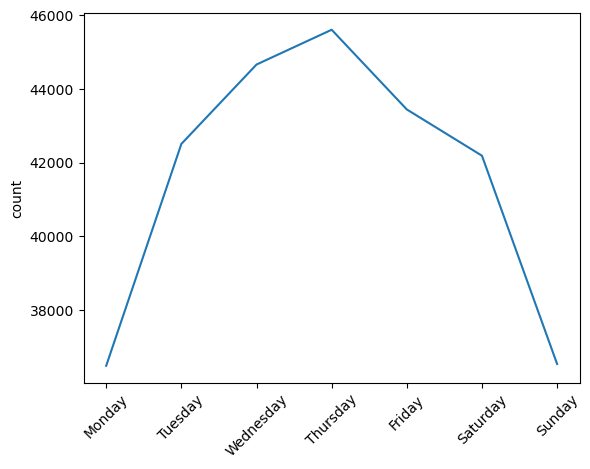

In [308]:
# Find and show the daily trends in taxi pickups (days of the week)
#def get_week_day(str_date):    
#    str_format = '%Y-%m-%d %H:%M:%S'
#    date_obj = datetime.strptime(str_date, str_format)
#    day = date_obj.date().weekday() + 1
#    match day:
#        case 1:
#            return "Monday"
#        case 2:
#            return "Tuesday"
#        case 3:
#            return "Wednesday"
#        case 4:
#            return "Thursday"
#            return "Firday"
#        case 6:
#            return "Saturday"
#        case default:
#            return "Sunday"

plt.xticks(rotation = 45)
dataframe['num_day'] = dataframe['tpep_pickup_datetime'].apply(lambda x: (datetime.strptime(x, str_format)).weekday() + 1) #2023-09-30 01:39:21
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
val_counts = dataframe.groupby('num_day')['num_day'].value_counts()
sns.lineplot(x=days, y=val_counts)
plt.show()

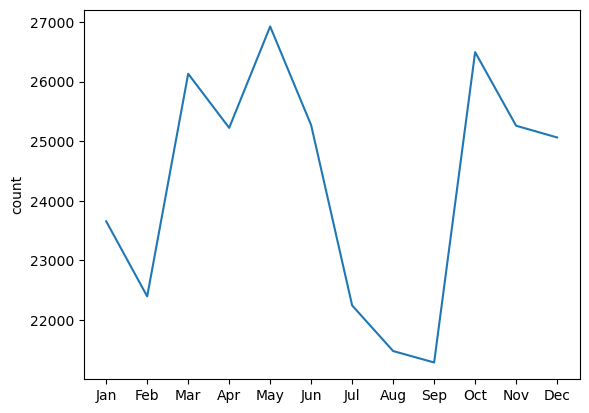

In [309]:
# Show the monthly trends in pickups
str_format = '%Y-%m-%d %H:%M:%S'
dataframe['months'] = dataframe['tpep_pickup_datetime'].apply(lambda x: (datetime.strptime(x, str_format)).date().month) #2023-09-30 01:39:21
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
val_counts = dataframe.groupby('months')['months'].value_counts()
sns.lineplot(x=months, y=val_counts)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [310]:
# Analyse the above parameters
print("fare_amount <= 0: ", dataframe[dataframe['fare_amount'] <= 0]['fare_amount'].count())
print("total_amount <= 0: ", dataframe[dataframe['total_amount'] <= 0]['total_amount'].count())
print("trip_distance <= 0: ", dataframe[dataframe['trip_distance'] <= 0]['trip_distance'].count())

index_zero_trip_distance =  dataframe[dataframe['trip_distance'] == 0].index
dataframe.drop(index = index_zero_trip_distance, inplace=True) #288044

index_zero_fare_amount = dataframe[dataframe['fare_amount'] <= 0].index
dataframe.drop(index = index_zero_fare_amount, inplace=True)

fare_amount <= 0:  78
total_amount <= 0:  46
trip_distance <= 0:  3367


In [311]:
print("fare_amount <= 0: ", dataframe[dataframe['fare_amount'] <= 0]['fare_amount'].count())
print("total_amount <= 0: ", dataframe[dataframe['total_amount'] <= 0]['total_amount'].count())
print("trip_distance <= 0: ", dataframe[dataframe['trip_distance'] <= 0]['trip_distance'].count())

fare_amount <= 0:  0
total_amount <= 0:  0
trip_distance <= 0:  0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [312]:
# Create a df with non zero entries for the selected parameters.
# I am retaining the original datafame


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

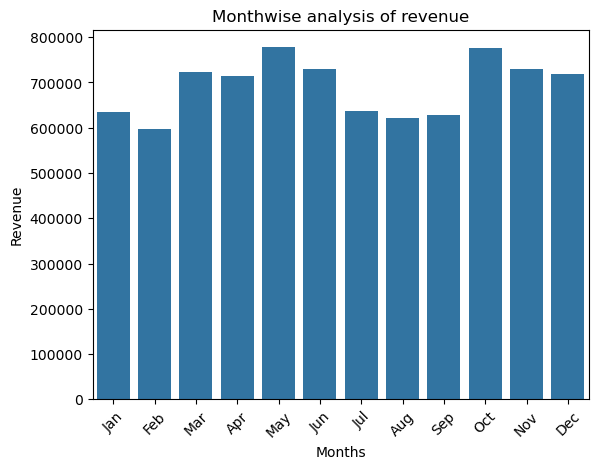

In [313]:
# Group data by month and analyse monthly revenue
import plotly.express as ptx

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
result = dataframe.groupby(['months'])['total_amount'].sum().reset_index(name='total_amount_per_month')

plt.title('Monthwise analysis of revenue')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
#plt.show()
sns.barplot(x=months, y=result['total_amount_per_month'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

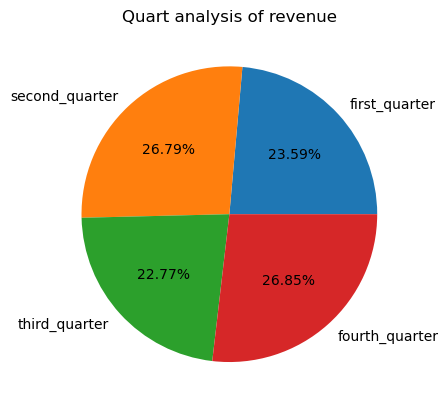

In [314]:
# Calculate proportion of each quarter
sum_all = result['total_amount_per_month'].sum()
first_q = (100 * (result[(result['months'] == 1) | (result['months'] < 4)]['total_amount_per_month']).sum()/sum_all)
second_q = (100 * (result[(result['months'] > 3) & (result['months'] < 7 )]['total_amount_per_month']).sum()/sum_all)
third_q = (100 * (result[(result['months'] > 6) & (result['months'] < 10 )]['total_amount_per_month']).sum()/sum_all)
fourth_q = (100 * (result[(result['months'] > 9) & (result['months'] < 13 )]['total_amount_per_month']).sum()/sum_all)
quarter = ['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter']
revenue = [first_q, second_q, third_q, fourth_q]

plt.title('Quart analysis of revenue')

data = {'quarter': quarter,'revenue': revenue}
result_df = pd.DataFrame.from_dict(data)
graph = plt.pie(revenue, labels=quarter, autopct='%.2f%%')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

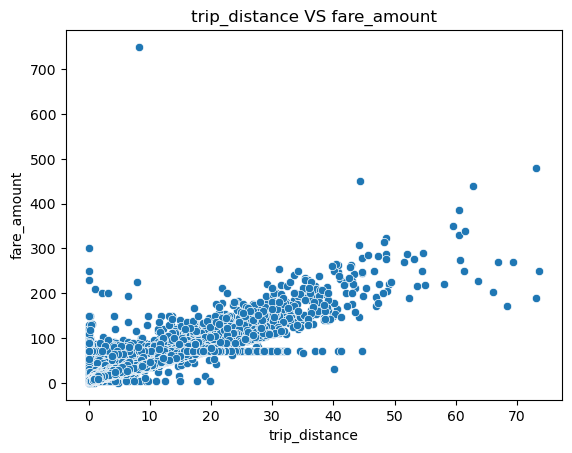

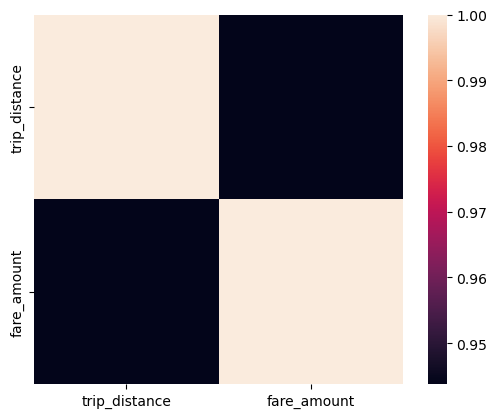

In [315]:
# Show how trip fare is affected by distance
dataframe['trip_distance'].corr(dataframe['fare_amount'])
dataframe['trip_distance'].value_counts()


plt.title('trip_distance VS fare_amount')
x_val = dataframe['trip_distance'].value_counts()
y_val = dataframe['fare_amount'].value_counts()
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
sns.scatterplot(x =  dataframe['trip_distance'], y = dataframe['fare_amount']) 
plt.show()            

corr_matrix =  np.corrcoef(dataframe['trip_distance'], dataframe['fare_amount'])

plt.imshow(corr_matrix, cmap='Blues')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

result = dataframe.filter(['trip_distance', 'fare_amount'], axis=1)
sns.heatmap( result.corr(numeric_only=True))

plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

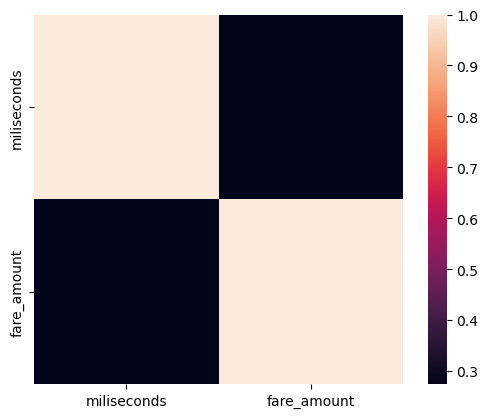

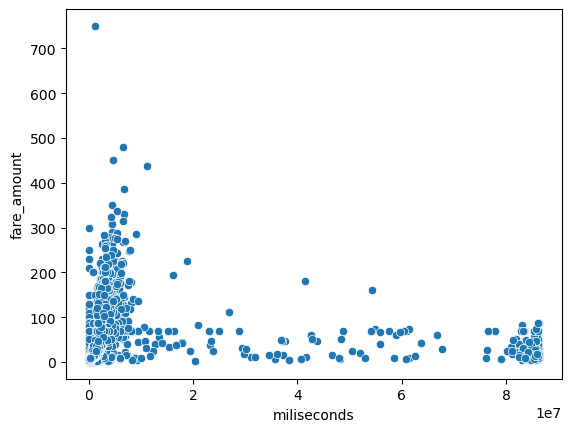

In [316]:
# Show relationship between fare and trip duration
str_format = '%Y-%m-%d %H:%M:%S'
dataframe['pickuptime'] = dataframe['tpep_pickup_datetime'].apply(lambda x: (datetime.strptime(x, str_format)))
dataframe['droptime'] = dataframe['tpep_dropoff_datetime'].apply(lambda x: (datetime.strptime(x, str_format)))
dataframe['trip_duration'] = dataframe['droptime'] - dataframe['pickuptime']

dataframe['miliseconds'] = ((3600000 * dataframe['trip_duration'].dt.components.hours)
                               + (60000 * dataframe['trip_duration'].dt.components.minutes) 
                               + (1000 * dataframe['trip_duration'].dt.components.seconds))
dataframe['miliseconds'].corr(dataframe['fare_amount'])
corr_matrix =  np.corrcoef(dataframe['miliseconds'], dataframe['fare_amount'])
plt.imshow(corr_matrix, cmap='Blues')
plt.xlabel('miliseconds')
plt.ylabel('fare_amount')
result = dataframe.filter(['miliseconds', 'fare_amount'], axis=1)
sns.heatmap( result.corr(numeric_only=True))
# Display the plot
plt.show()

x_val = dataframe['miliseconds'].value_counts()
y_val = dataframe['fare_amount'].value_counts()
plt.xlabel('miliseconds')
plt.ylabel('fare_amount')
sns.scatterplot(x =  dataframe['miliseconds'], y = dataframe['fare_amount']) 
plt.show()

0.04152235158323753


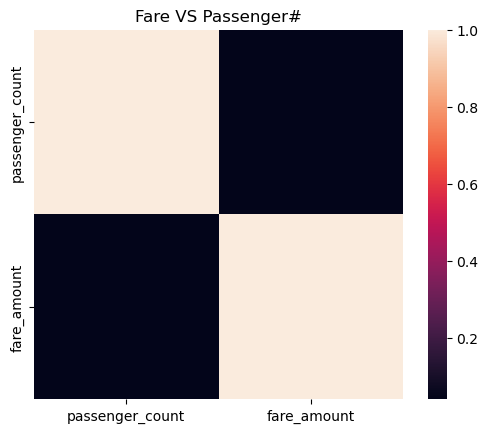

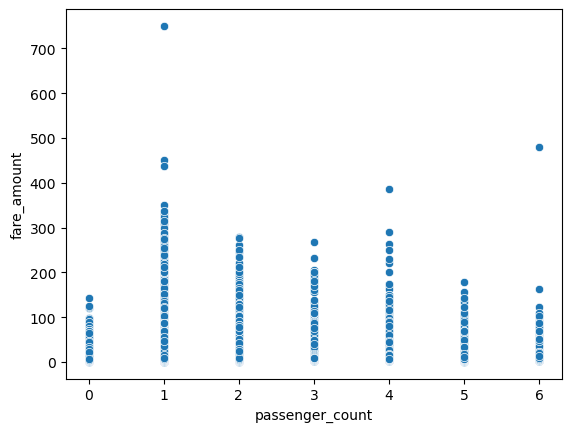

In [317]:
# Show relationship between fare and number of passengers
print(dataframe['passenger_count'].corr(dataframe['fare_amount']))
corr_matrix =  np.corrcoef(dataframe['passenger_count'], dataframe['fare_amount'])
plt.imshow(corr_matrix, cmap='Blues')
plt.title('Fare VS Passenger#')
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')

result = dataframe.filter(['passenger_count', 'fare_amount'], axis=1)
sns.heatmap( result.corr(numeric_only=True))
# Display the plot
plt.show()

x_val = dataframe['passenger_count'].value_counts()
y_val = dataframe['fare_amount'].value_counts()
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
sns.scatterplot(x =  dataframe['passenger_count'], y = dataframe['fare_amount']) 
plt.show()


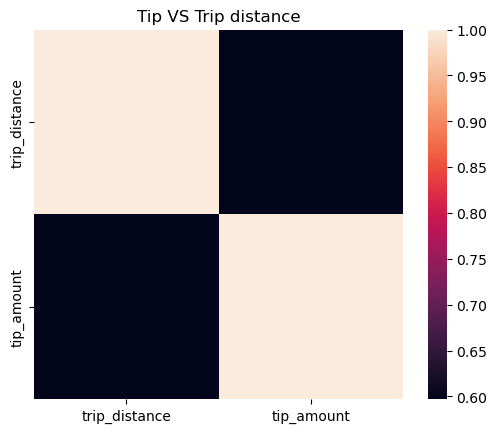

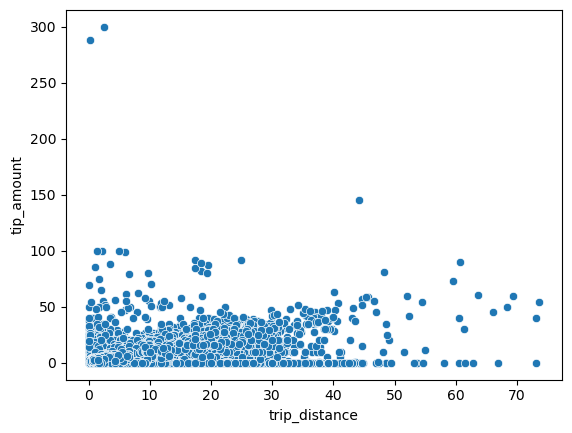

In [318]:
# Show relationship between tip and trip distance
dataframe['trip_distance'].corr(dataframe['tip_amount'])
corr_matrix =  np.corrcoef(dataframe['trip_distance'], dataframe['tip_amount'])
plt.title('Tip VS Trip distance')
plt.imshow(corr_matrix, cmap='Blues')
plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
result = dataframe.filter(['trip_distance', 'tip_amount'], axis=1)
sns.heatmap( result.corr(numeric_only=True))
# Display the plot
plt.show()

x_val = dataframe['trip_distance'].value_counts()
y_val = dataframe['tip_amount'].value_counts()
plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
sns.scatterplot(x =  dataframe['trip_distance'], y = dataframe['tip_amount']) 
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

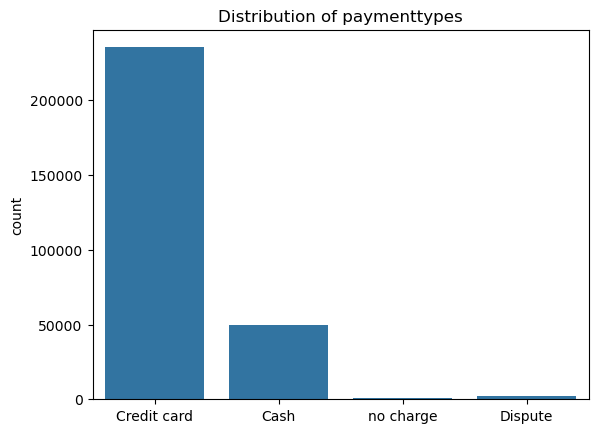

In [319]:
# Analyse the distribution of different payment types (payment_type).
val_counts = dataframe.groupby('payment_type')['payment_type'].value_counts()
plt.title('Distribution of paymenttypes')
payments = ['Credit card' , 'Cash', 'no charge', 'Dispute']
sns.barplot(x=payments , y=val_counts)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [59]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [320]:
import geopandas as gpd
print("geopandas version:", gpd.__version__)
zones = gpd.read_file(r'D:\Savitri\EDA\Assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp', rows=10) # read the .shp file using gpd
zones.info()

geopandas version: 0.14.4
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    10 non-null     int64   
 1   Shape_Leng  10 non-null     float64 
 2   Shape_Area  10 non-null     float64 
 3   zone        10 non-null     object  
 4   LocationID  10 non-null     int64   
 5   borough     10 non-null     object  
 6   geometry    10 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 692.0+ bytes


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    10 non-null     int64   
 1   Shape_Leng  10 non-null     float64 
 2   Shape_Area  10 non-null     float64 
 3   zone        10 non-null     object  
 4   LocationID  10 non-null     int64   
 5   borough     10 non-null     object  
 6   geometry    10 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 692.0+ bytes
None


<Axes: >

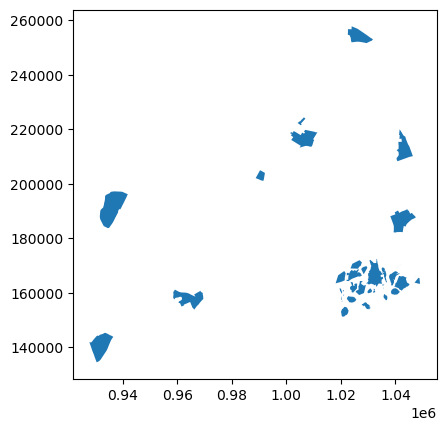

In [321]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [322]:
# Merge zones and trip records using locationID and PULocationID
zones['PULocationID'] = zones['LocationID']
zones = zones.drop('LocationID', axis = 1)

merged_df = pd.merge(dataframe, zones, on='PULocationID', how='inner')
merged_df.to_csv(r'D:\Savitri\EDA\Assignment\merged_df.csv')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickuptime,droptime,trip_duration,miliseconds,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,2,2023-09-14 00:51:33,2023-09-14 01:03:12,1.0,2.23,1.0,N,4,90,1,...,2023-09-14 00:51:33,2023-09-14 01:03:12,0 days 00:11:39,699000,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
1,2,2023-09-19 18:28:04,2023-09-19 19:16:27,1.0,14.47,2.0,N,10,186,1,...,2023-09-19 18:28:04,2023-09-19 19:16:27,0 days 00:48:23,2903000,10,0.099839,0.000436,Baisley Park,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ..."
2,2,2023-09-02 13:46:41,2023-09-02 14:01:48,1.0,1.26,1.0,N,7,179,2,...,2023-09-02 13:46:41,2023-09-02 14:01:48,0 days 00:15:07,907000,7,0.107417,0.000390,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ..."
3,2,2023-09-15 12:50:02,2023-09-15 12:52:37,1.0,0.29,1.0,N,10,10,2,...,2023-09-15 12:50:02,2023-09-15 12:52:37,0 days 00:02:35,155000,10,0.099839,0.000436,Baisley Park,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ..."
4,2,2023-09-18 16:01:05,2023-09-18 17:14:28,1.0,14.20,2.0,N,10,161,1,...,2023-09-18 16:01:05,2023-09-18 17:14:28,0 days 01:13:23,4403000,10,0.099839,0.000436,Baisley Park,Queens,"POLYGON ((1044355.072 190734.321, 1044612.122 ..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [323]:
# Group data by location and calculate the number of trips
merged_df.count()
trip_count = merged_df.groupby('PULocationID')['PULocationID'].count()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [324]:
# Merge trip counts back to the zones GeoDataFrame
zones['trip_counts'] = trip_count
zones.count()

OBJECTID        10
Shape_Leng      10
Shape_Area      10
zone            10
borough         10
geometry        10
PULocationID    10
trip_counts      5
dtype: int64

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

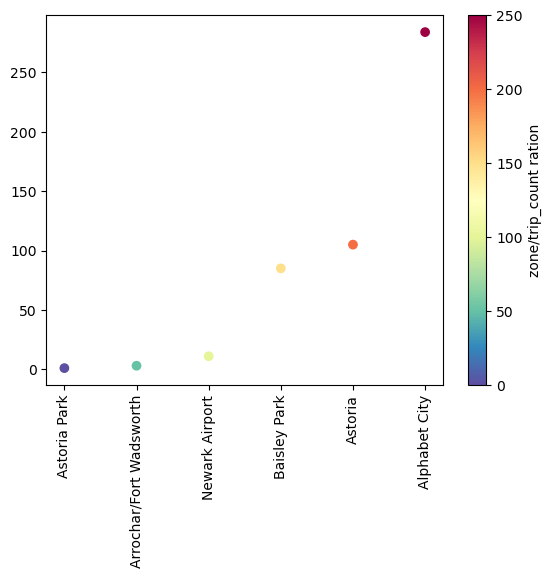

In [325]:
# Define figure and axis
import plotly.express as ptx
import matplotlib.pyplot as plt
from matplotlib import colormaps

plt.xticks(rotation = 90)
x_zone = ['Astoria Park', 'Arrochar/Fort Wadsworth', 'Newark Airport', 'Baisley Park', 'Astoria', 'Alphabet City']
y_trip_counts =  merged_df.groupby('zone')['PULocationID'].value_counts().sort_values()

ratio = [0, 50, 100, 150, 200, 250] 
  
# scatterplot 
plt.scatter(x=x_zone, y=y_trip_counts, c=ratio, cmap="Spectral_r") 
  
plt.colorbar(label="zone/trip_count ration", orientation="vertical") 
plt.show() 

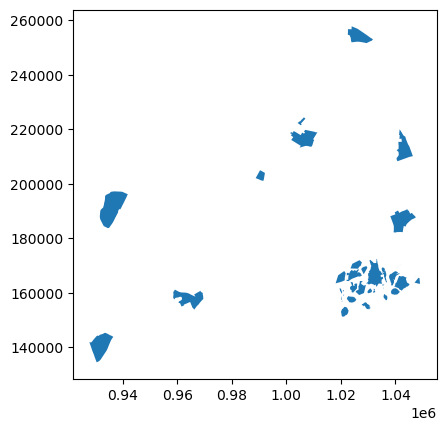

,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry,PULocationID,trip_counts
8,9,0.099784,0.000338,Auburndale,Queens,"POLYGON ((1043803.993 216615.925, 1043849.708 ...",9,1.0
6,7,0.107417,0.000390,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",7,3.0
1,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,11.0
7,8,0.027591,0.000027,Astoria Park,Queens,"POLYGON ((1005482.276 221686.466, 1005304.898 ...",8,105.0
4,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",5,284.0


In [326]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('trip_counts', axis = 0,ascending=True, inplace=True, na_position='last')

zones.plot()
plt.show()

zones.head()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [327]:
# Find routes which have the slowest speeds at different times of the day
merged_df['trip_speed']  = merged_df['trip_distance'] / ((merged_df['miliseconds']/1000)/60)
merged_df.sort_values('trip_speed', axis = 0,ascending=True, inplace=True, na_position='last')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,droptime,trip_duration,miliseconds,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry,trip_speed
356,2,2023-11-05 01:56:20,2023-11-05 01:08:42,2.0,3.45,1.0,N,4,88,1,...,2023-11-05 01:08:42,-1 days +23:12:22,83542000,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",0.002478
354,2,2023-11-22 15:21:16,2023-11-22 15:29:14,1.0,0.08,1.0,N,7,179,1,...,2023-11-22 15:29:14,0 days 00:07:58,478000,7,0.107417,0.000390,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",0.010042
426,2,2023-10-08 01:51:41,2023-10-08 02:52:39,1.0,1.58,1.0,N,4,232,1,...,2023-10-08 02:52:39,0 days 01:00:58,3658000,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",0.025916
281,2,2023-03-12 15:29:01,2023-03-12 15:29:23,2.0,0.01,5.0,N,1,1,1,...,2023-03-12 15:29:23,0 days 00:00:22,22000,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",0.027273
380,1,2023-11-19 08:28:15,2023-11-19 08:32:06,2.0,0.20,1.0,Y,7,7,1,...,2023-11-19 08:32:06,0 days 00:03:51,231000,7,0.107417,0.000390,Astoria,Queens,"POLYGON ((1010804.218 218919.641, 1011049.165 ...",0.051948


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

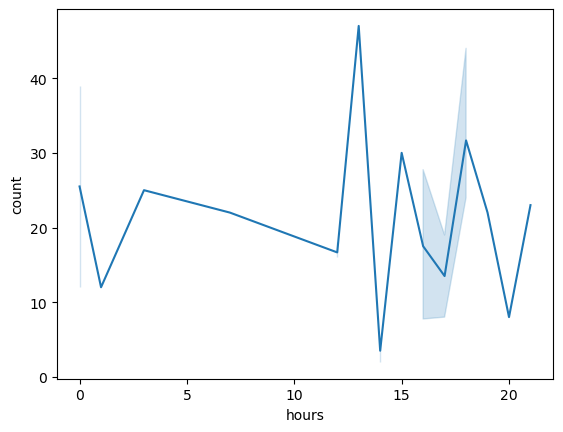

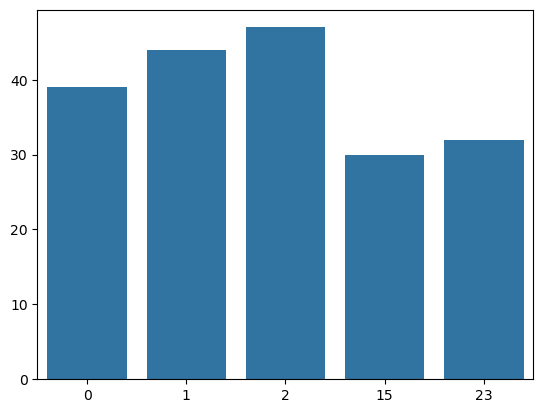

In [328]:
# Visualise the number of trips per hour and find the busiest hour
val_counts = merged_df.groupby('hours')['hours'].value_counts()
sns.lineplot(x=merged_df['hours'], y=val_counts)
plt.show()

merged_df.groupby('hours').count()
temp_data = merged_df.groupby('hours').count()
temp_data.sort_values('VendorID', axis = 0,ascending=False, inplace=True, na_position='last')
temp_data.head()
x_hrs = [2, 1, 0, 23, 15]
y_cnt = [47, 44, 39, 32, 30]

sns.barplot(x=x_hrs, y=y_cnt)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

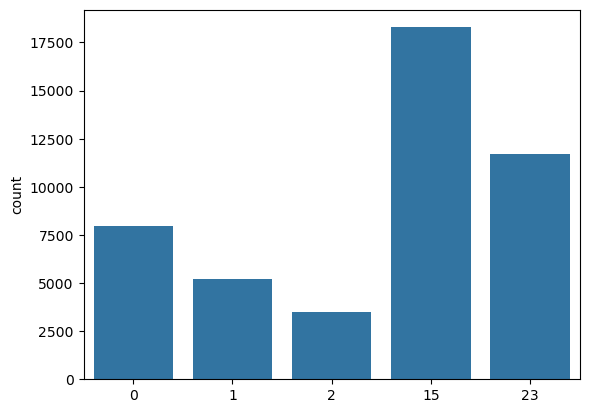

In [329]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
x_hrs = [0,1,2,15,23]
sample_fraction = dataframe[dataframe.hours.isin(x_hrs)]
y_cnt = sample_fraction.groupby('hours')['hours'].value_counts()
sns.barplot(x=x_hrs, y=y_cnt)
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

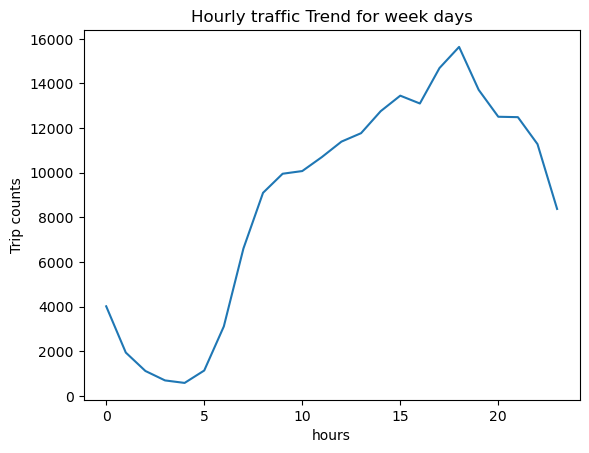

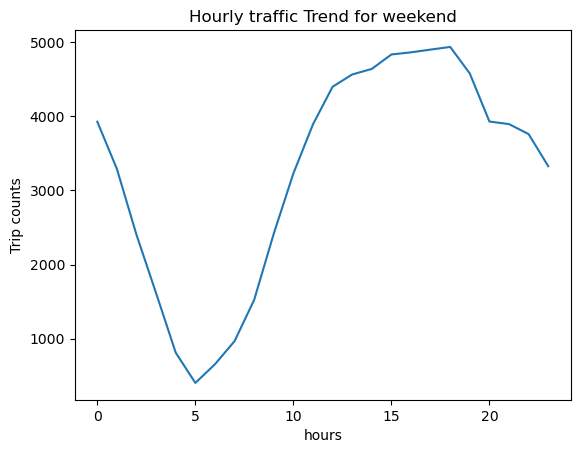

In [330]:
# Compare traffic trends for the week days and weekends
def get_week_day(str_date):    
    str_format = '%Y-%m-%d %H:%M:%S'
    date_obj = datetime.strptime(str_date, str_format)
    day = date_obj.date().weekday() + 1
    match day:
        case 1:
            return "Monday"
        case 2:
            return "Tuesday"
        case 3:
            return "Wednesday"
        case 4:
            return "Thursday"
        case 5:
            return "Firday"
        case 6:
            return "Saturday"
        case default:
            return "Sunday"

weekdays = [1,2,3,4,5]
weekend = [6,7]
df_week_trend = dataframe[dataframe.num_day.isin(weekdays)]
df_weekend_trend = dataframe[dataframe.num_day.isin(weekend)]

plt.title('Hourly traffic Trend for week days')
plt.xlabel('Hours of the day')
plt.ylabel('Trip counts')
df_week_trend.groupby('hours')['hours'].count().plot()
plt.show()

plt.title('Hourly traffic Trend for weekend')
plt.xlabel('Hours of the day')
plt.ylabel('Trip counts')
df_weekend_trend.groupby('hours')['hours'].count().plot()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [331]:
# Find top 10 pickup and dropoff zones
merged_df.head()
merged_df.groupby('zone')['tpep_pickup_datetime'].value_counts()

zone            tpep_pickup_datetime
Alphabet City   2023-01-01 01:03:49     1
                2023-01-01 03:47:27     1
                2023-01-05 12:56:12     1
                2023-01-06 20:54:47     1
                2023-01-07 00:44:10     1
                                       ..
Newark Airport  2023-08-01 15:56:51     1
                2023-08-23 15:08:40     1
                2023-09-19 18:55:38     1
                2023-10-05 13:07:38     1
                2023-11-01 16:04:54     1
Name: count, Length: 489, dtype: int64

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [332]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#Assumption since there are only 5 zones this question seems wrong


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

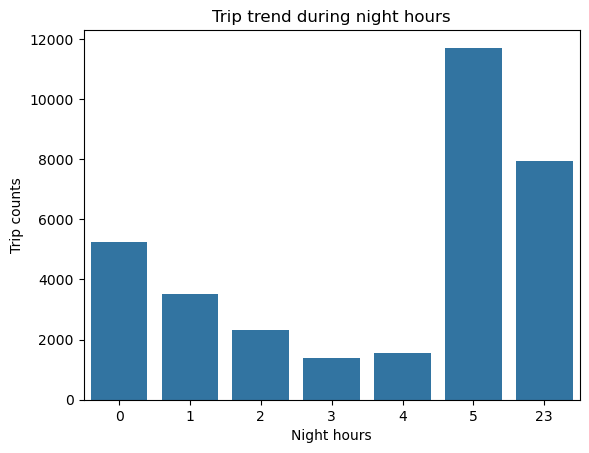

In [333]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
plt.title('Trip trend during night hours')
plt.xlabel('Night hours')
plt.ylabel('Trip counts')
x_hrs = [23,0,1,2,3,4,5]
sample_fraction = dataframe[dataframe.hours.isin(x_hrs)] 
y_cnt = sample_fraction.groupby('hours')['hours'].value_counts()
sns.barplot(x=x_hrs, y=y_cnt)
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

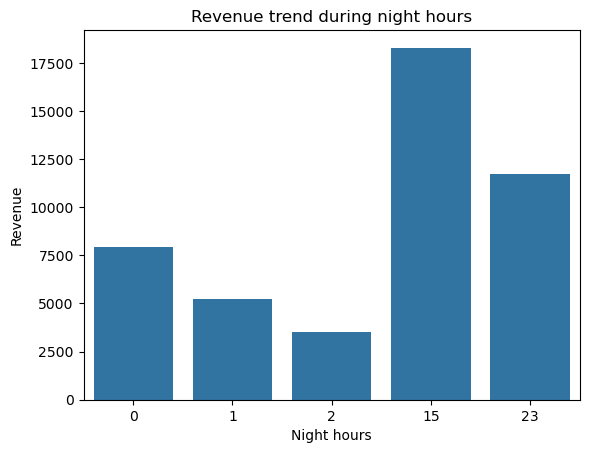

In [334]:
# Filter for night hours (11 PM to 5 AM)
plt.title('Revenue trend during night hours')
plt.xlabel('Night hours')
plt.ylabel('Revenue')
x_hrs = [0,1,2,15,23]
sample_fraction = dataframe[dataframe.hours.isin(x_hrs)] 
y_cnt = sample_fraction.groupby('hours')['hours'].value_counts()
sns.barplot(x=x_hrs, y=y_cnt)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [335]:
# Analyse the fare per mile per passenger for different passenger counts
dataframe.head()
dataframe['fare_per_cust'] =  dataframe['fare_amount'] / dataframe['passenger_count']
dataframe.head()
result = dataframe.groupby(['passenger_count', 'fare_per_cust'])['fare_per_cust'].value_counts()

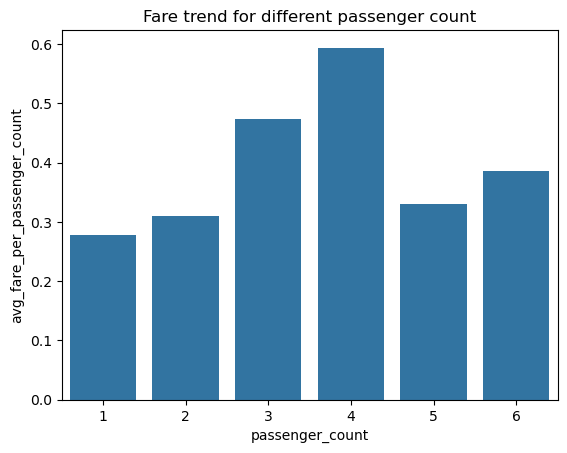

In [336]:
passenger_df = pd.read_csv(r"D:\Savitri\EDA\Assignment\fare_count_per_cust.csv")
passenger_df.head()
c1 = passenger_df[passenger_df['passenger_count'] == 1]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 1]['count'].sum()
c2 = passenger_df[passenger_df['passenger_count'] == 2]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 2]['count'].sum()
c3 = passenger_df[passenger_df['passenger_count'] == 3]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 3]['count'].sum()
c4 = passenger_df[passenger_df['passenger_count'] == 4]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 4]['count'].sum()
c5 = passenger_df[passenger_df['passenger_count'] == 5]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 5]['count'].sum()
c6 = passenger_df[passenger_df['passenger_count'] == 6]['fare_per_cust'].sum()/passenger_df[passenger_df['passenger_count'] == 6]['count'].sum()
plt.title("Fare trend for different passenger count")
plt.xlabel('passenger_count')
plt.ylabel('avg_fare_per_passenger_count')
x_series = [1,2,3,4,5,6,]
y_series = [c1,c2,c3,c4,c5,c6]

sns.barplot(x=x_series, y=y_series)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

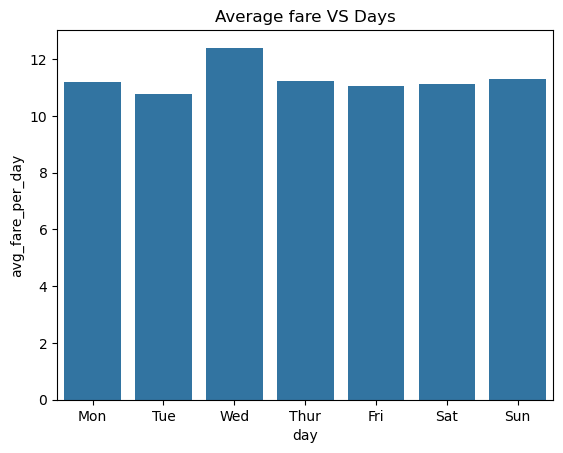

In [337]:
# Compare the average fare per mile for different days and for different times of the day
dataframe['fare_per_mile'] =  dataframe['fare_amount'] / dataframe['trip_distance']
dataframe.head()

c1 = dataframe[dataframe['num_day'] == 1]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 1]['num_day'].count()
c2 = dataframe[dataframe['num_day'] == 2]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 2]['num_day'].count()
c3 = dataframe[dataframe['num_day'] == 3]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 3]['num_day'].count()
c4 = dataframe[dataframe['num_day'] == 4]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 4]['num_day'].count()
c5 = dataframe[dataframe['num_day'] == 5]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 5]['num_day'].count()
c6 = dataframe[dataframe['num_day'] == 6]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 6]['num_day'].count()
c7 = dataframe[dataframe['num_day'] == 7]['fare_per_mile'].sum()/dataframe[dataframe['num_day'] == 7]['num_day'].count()
plt.title('Average fare VS Days')
plt.xlabel('day')
plt.ylabel('avg_fare_per_day')
x_series = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
y_series = [c1,c2,c3,c4,c5,c6,c7]
sns.barplot(x=x_series, y=y_series)
plt.show()

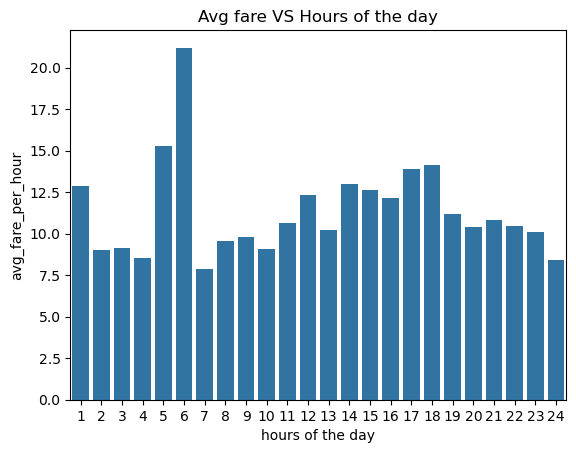

In [338]:
c1 = dataframe[dataframe['hours'] == 0]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 0]['hours'].count()
c2 = dataframe[dataframe['hours'] == 1]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 1]['hours'].count()
c3 = dataframe[dataframe['hours'] == 2]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 2]['hours'].count()
c4 = dataframe[dataframe['hours'] == 3]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 3]['hours'].count()
c5 = dataframe[dataframe['hours'] == 4]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 4]['hours'].count()
c6 = dataframe[dataframe['hours'] == 5]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 5]['hours'].count()
c7 = dataframe[dataframe['hours'] == 6]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 6]['hours'].count()
c8 = dataframe[dataframe['hours'] == 7]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 7]['hours'].count()
c9 = dataframe[dataframe['hours'] == 8]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 8]['hours'].count()
c10 = dataframe[dataframe['hours'] == 9]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 9]['hours'].count()
c11 = dataframe[dataframe['hours'] == 10]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 10]['hours'].count()
c12 = dataframe[dataframe['hours'] == 11]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 11]['hours'].count()
c13 = dataframe[dataframe['hours'] == 12]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 12]['hours'].count()
c14 = dataframe[dataframe['hours'] == 13]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 13]['hours'].count()
c15 = dataframe[dataframe['hours'] == 14]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 14]['hours'].count()
c16 = dataframe[dataframe['hours'] == 15]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 15]['hours'].count()
c17 = dataframe[dataframe['hours'] == 16]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 16]['hours'].count()
c18 = dataframe[dataframe['hours'] == 17]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 17]['hours'].count()
c19 = dataframe[dataframe['hours'] == 18]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 18]['hours'].count()
c20 = dataframe[dataframe['hours'] == 19]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 19]['hours'].count()
c21 = dataframe[dataframe['hours'] == 20]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 20]['hours'].count()
c22 = dataframe[dataframe['hours'] == 21]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 21]['hours'].count()
c23 = dataframe[dataframe['hours'] == 22]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 22]['hours'].count()
c24 = dataframe[dataframe['hours'] == 23]['fare_per_mile'].sum()/dataframe[dataframe['hours'] == 23]['hours'].count()
plt.title('Avg fare VS Hours of the day')
plt.xlabel('hours of the day')
plt.ylabel('avg_fare_per_hour')
x_series = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y_series = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24]
sns.barplot(x=x_series, y=y_series)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

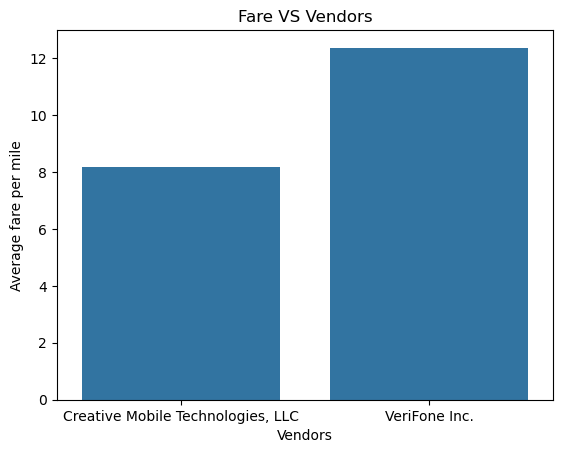

In [339]:
# Compare fare per mile for different vendors
dataframe['VendorID'].value_counts()
c1 = dataframe[dataframe['VendorID'] == 1]['fare_per_mile'].sum() / dataframe[dataframe['VendorID'] == 1]['fare_per_mile'].count()
c2 = dataframe[dataframe['VendorID'] == 2]['fare_per_mile'].sum() / dataframe[dataframe['VendorID'] == 2]['fare_per_mile'].count()
x_series = ['Creative Mobile Technologies, LLC','VeriFone Inc.']
y_series = [c1,c2]
plt.title('Fare VS Vendors')
plt.xlabel('Vendors')
plt.ylabel('Average fare per mile')
sns.barplot(x=x_series, y=y_series)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


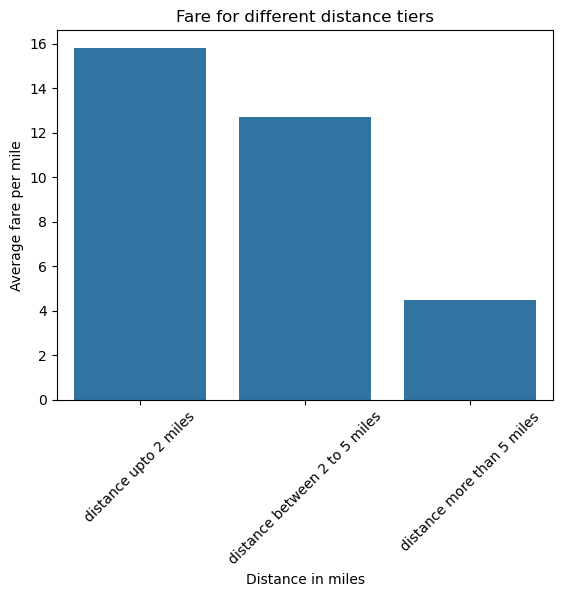

In [340]:
# Defining distance tiers
c1 = dataframe[dataframe['trip_distance'] < 2]['fare_per_mile'].sum() / dataframe[dataframe['trip_distance'] < 2]['fare_per_mile'].count()
c2 = dataframe[(dataframe['trip_distance'] == 2) | (dataframe['trip_distance'] < 5)]['fare_per_mile'].sum() / dataframe[(dataframe['trip_distance'] == 2) | (dataframe['trip_distance'] < 5)]['fare_per_mile'].count()
c3 = dataframe[(dataframe['trip_distance'] > 5)]['fare_per_mile'].sum() / dataframe[(dataframe['trip_distance'] > 5)]['fare_per_mile'].count()
x_series = ['distance upto 2 miles','distance between 2 to 5 miles', 'distance more than 5 miles']
y_series = [c1,c2, c3]
plt.xticks(rotation=45)
plt.title('Fare for different distance tiers')
plt.xlabel('Distance in miles')
plt.ylabel('Average fare per mile')
sns.barplot(x=x_series, y=y_series)
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

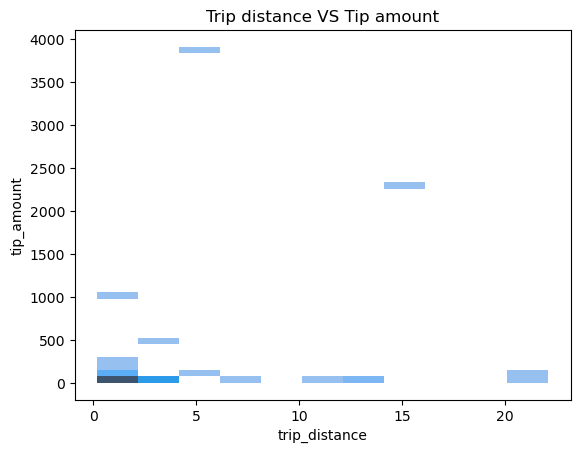

In [341]:
#  Analyze tip percentages based on distances
plt.title('Trip distance VS Tip amount')
result_sum = dataframe.groupby('trip_distance')['tip_amount'].count()
sns.histplot(x=dataframe['trip_distance'], y=result_sum)
plt.show()

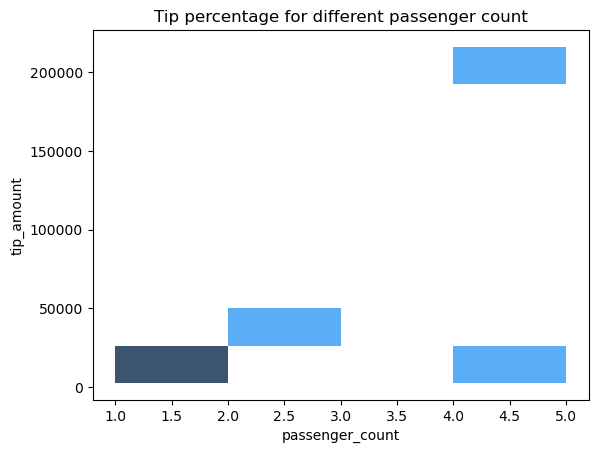

In [342]:
#  Analyze tip percentages based on passenger counts 
plt.title('Tip percentage for different passenger count')
result_sum = dataframe.groupby('passenger_count')['tip_amount'].count()
sns.histplot(x=dataframe['passenger_count'], y=result_sum)
plt.show()

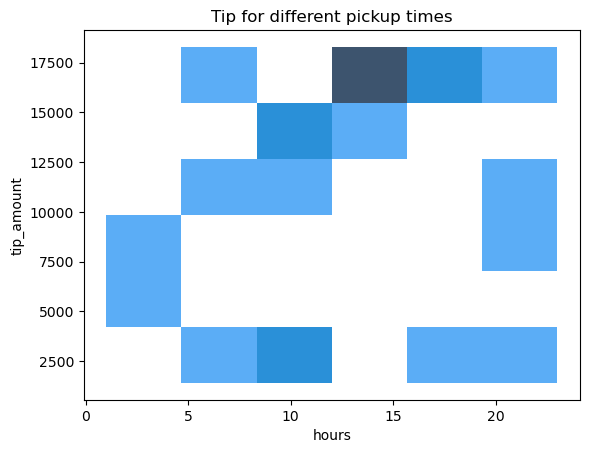

In [343]:
#  Analyze tip percentages based on pickup times
plt.title('Tip for different pickup times')
result_sum = dataframe.groupby('hours')['tip_amount'].count()
sns.histplot(x=dataframe['hours'], y=result_sum)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

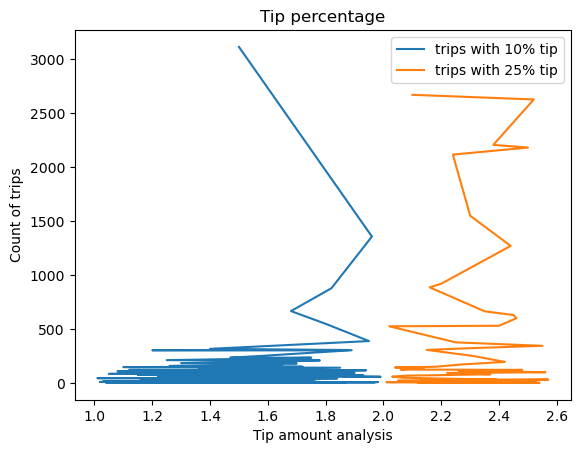

In [344]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
tips_10_perc = dataframe[(dataframe['tip_amount'] > 1) & (dataframe['tip_amount'] < 2) ]['tip_amount']
tips_25_perc = dataframe[(dataframe['tip_amount'] > 2) & (dataframe['tip_amount'] <2.58) ]['tip_amount']
plt.title('Tip percentage')
plt.xlabel('Tip amount analysis')
plt.ylabel('Count of trips')
plt.plot(tips_10_perc.value_counts(), label = 'trips with 10% tip')
plt.plot(tips_25_perc.value_counts(), label = 'trips with 25% tip')
plt.legend()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

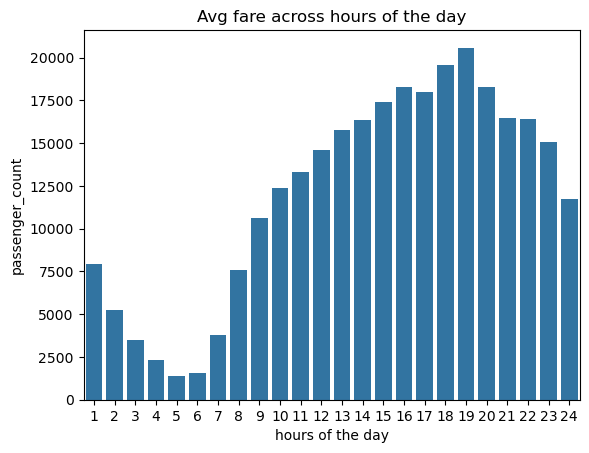

In [345]:
## See how passenger count varies across hours and days
#dataframe['num_day
c1 = dataframe[dataframe['hours'] == 0]['passenger_count'].count()
c2 = dataframe[dataframe['hours'] == 1]['passenger_count'].count()
c3 = dataframe[dataframe['hours'] == 2]['passenger_count'].count()
c4 = dataframe[dataframe['hours'] == 3]['passenger_count'].count()
c5 = dataframe[dataframe['hours'] == 4]['passenger_count'].count()
c6 = dataframe[dataframe['hours'] == 5]['passenger_count'].count()
c7 = dataframe[dataframe['hours'] == 6]['passenger_count'].count()
c8 = dataframe[dataframe['hours'] == 7]['passenger_count'].count()
c9 = dataframe[dataframe['hours'] == 8]['passenger_count'].count()
c10 = dataframe[dataframe['hours'] == 9]['passenger_count'].count()
c11 = dataframe[dataframe['hours'] == 10]['passenger_count'].count()
c12 = dataframe[dataframe['hours'] == 11]['passenger_count'].count()
c13 = dataframe[dataframe['hours'] == 12]['passenger_count'].count()
c14 = dataframe[dataframe['hours'] == 13]['passenger_count'].count()
c15 = dataframe[dataframe['hours'] == 14]['passenger_count'].count()
c16 = dataframe[dataframe['hours'] == 15]['passenger_count'].count()
c17 = dataframe[dataframe['hours'] == 16]['passenger_count'].count()
c18 = dataframe[dataframe['hours'] == 17]['passenger_count'].count()
c19 = dataframe[dataframe['hours'] == 18]['passenger_count'].count()
c20 = dataframe[dataframe['hours'] == 19]['passenger_count'].count()
c21 = dataframe[dataframe['hours'] == 20]['passenger_count'].count()
c22 = dataframe[dataframe['hours'] == 21]['passenger_count'].count()
c23 = dataframe[dataframe['hours'] == 22]['passenger_count'].count()
c24 = dataframe[dataframe['hours'] == 23]['passenger_count'].count()
plt.title('Avg fare across hours of the day')
plt.xlabel('hours of the day')
plt.ylabel('passenger_count')
x_series = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y_series = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24]
sns.barplot(x=x_series, y=y_series)
plt.show()

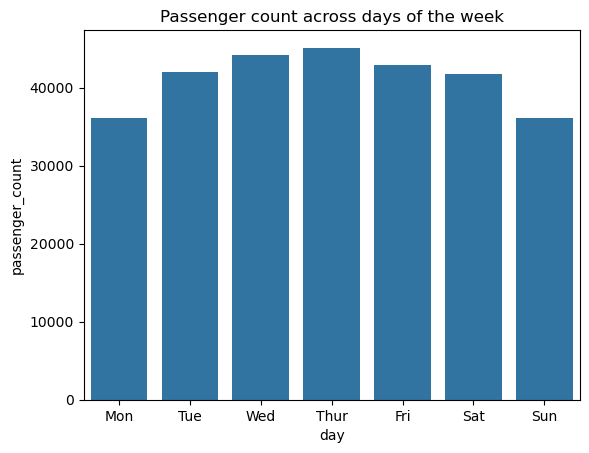

In [346]:
c1 = dataframe[dataframe['num_day'] == 1]['passenger_count'].count()
c2 = dataframe[dataframe['num_day'] == 2]['passenger_count'].count()
c3 = dataframe[dataframe['num_day'] == 3]['passenger_count'].count()
c4 = dataframe[dataframe['num_day'] == 4]['passenger_count'].count()
c5 = dataframe[dataframe['num_day'] == 5]['passenger_count'].count()
c6 = dataframe[dataframe['num_day'] == 6]['passenger_count'].count()
c7 = dataframe[dataframe['num_day'] == 7]['passenger_count'].count()
plt.title('Passenger count across days of the week')
plt.xlabel('day')
plt.ylabel('passenger_count')
x_series = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
y_series = [c1,c2,c3,c4,c5,c6,c7]
sns.barplot(x=x_series, y=y_series)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

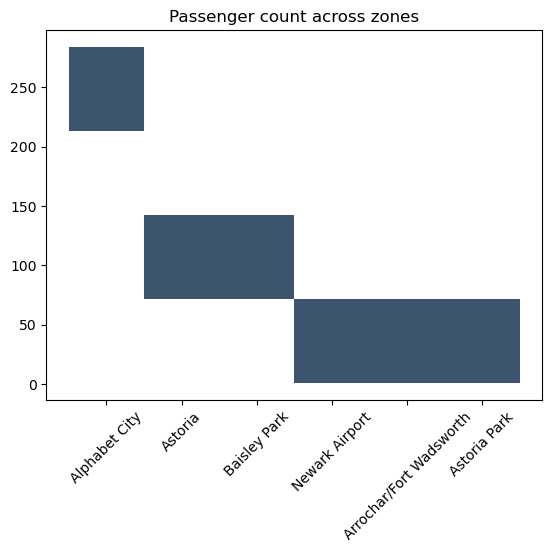

In [347]:
# How does passenger count vary across zones
merged_df['zone'].value_counts()

plt.title('Passenger count across zones')
plt.xticks(rotation = 45)
c1 = merged_df[merged_df['zone'] == 'Alphabet City']['passenger_count'].count()
c2 = merged_df[merged_df['zone'] == 'Astoria']['passenger_count'].count()
c3 = merged_df[merged_df['zone'] == 'Baisley Park']['passenger_count'].count()
c4 = merged_df[merged_df['zone'] == 'Newark Airport']['passenger_count'].count()
c5 = merged_df[merged_df['zone'] == 'Arrochar/Fort Wadsworth']['passenger_count'].count()
c6 = merged_df[merged_df['zone'] == 'Astoria Park']['passenger_count'].count()
x_series = ['Alphabet City', 'Astoria', 'Baisley Park', 'Newark Airport', 'Arrochar/Fort Wadsworth', 'Astoria Park']
y_series = [c1, c2, c3, c4, c5, c6]
sns.histplot(x = x_series, y= y_series)
plt.show()

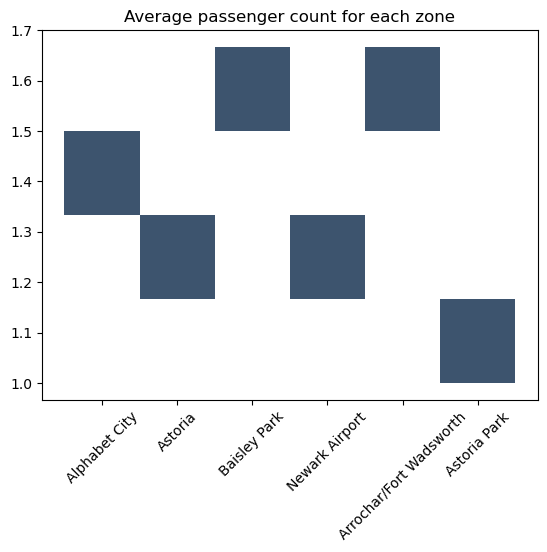

In [348]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
plt.xticks(rotation = 45)
plt.title('Average passenger count for each zone')
c1 = merged_df[merged_df['zone'] == 'Alphabet City']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Alphabet City']['passenger_count'].count()
c2 = merged_df[merged_df['zone'] == 'Astoria']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Astoria']['passenger_count'].count()
c3 = merged_df[merged_df['zone'] == 'Baisley Park']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Baisley Park']['passenger_count'].count()
c4 = merged_df[merged_df['zone'] == 'Newark Airport']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Newark Airport']['passenger_count'].count()
c5 = merged_df[merged_df['zone'] == 'Arrochar/Fort Wadsworth']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Arrochar/Fort Wadsworth']['passenger_count'].count()
c6 = merged_df[merged_df['zone'] == 'Astoria Park']['passenger_count'].sum()/merged_df[merged_df['zone'] == 'Astoria Park']['passenger_count'].count()
x_series = ['Alphabet City', 'Astoria', 'Baisley Park', 'Newark Airport', 'Arrochar/Fort Wadsworth', 'Astoria Park']
y_series = [c1, c2, c3, c4, c5, c6]

sns.histplot(x = x_series, y= y_series)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [349]:
# How often is each surcharge applied?
surcharge_count = dataframe[dataframe['congestion_surcharge'] > 1]

# row# with surchage > 1 / total number of rows
print('Surchange recurrence in % : ', 269090/288005 * 100)

Surchange recurrence in % :  93.43240568740127


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.